In [2]:
# Import Libraries
#System
import os 

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt
import time

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [3]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None 
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_22336\1719351524.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## Read Full DataSet

In [5]:
df = pd.read_csv('data/data.csv')

## EDA

In [8]:
## Missing Values
df.isna().sum().sort_values(ascending=False)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 After-tax Net Profit Growth Rate                           0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [48]:
cols = df.columns

In [28]:
corr_matrix = df.corr()
corr_matrix["Bankrupt?"].sort_values(ascending=False).head(10)

Bankrupt?                               1.000000
 Debt ratio %                           0.250161
 Current Liability to Assets            0.194494
 Borrowing dependency                   0.176543
 Current Liability to Current Assets    0.171306
 Liability to Equity                    0.166812
 Current Liabilities/Equity             0.153828
 Current Liability to Equity            0.153828
 Liability-Assets Flag                  0.139212
 Total expense/Assets                   0.139049
Name: Bankrupt?, dtype: float64

In [30]:
corr_matrix["Bankrupt?"].sort_values(ascending=False).tail(10)

 Per Share Net profit before tax (Yuan ¥)                  -0.201395
 Net profit before tax/Paid-in capital                     -0.207857
 Retained Earnings to Total Assets                         -0.217779
 Persistent EPS in the Last Four Seasons                   -0.219560
 Net worth/Assets                                          -0.250161
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(B) before interest and depreciation after tax         -0.273051
 ROA(A) before interest and % after tax                    -0.282941
 Net Income to Total Assets                                -0.315457
 Net Income Flag                                                 NaN
Name: Bankrupt?, dtype: float64

In [32]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

## Correlations

In [60]:
described = df.describe().T

<AxesSubplot:>

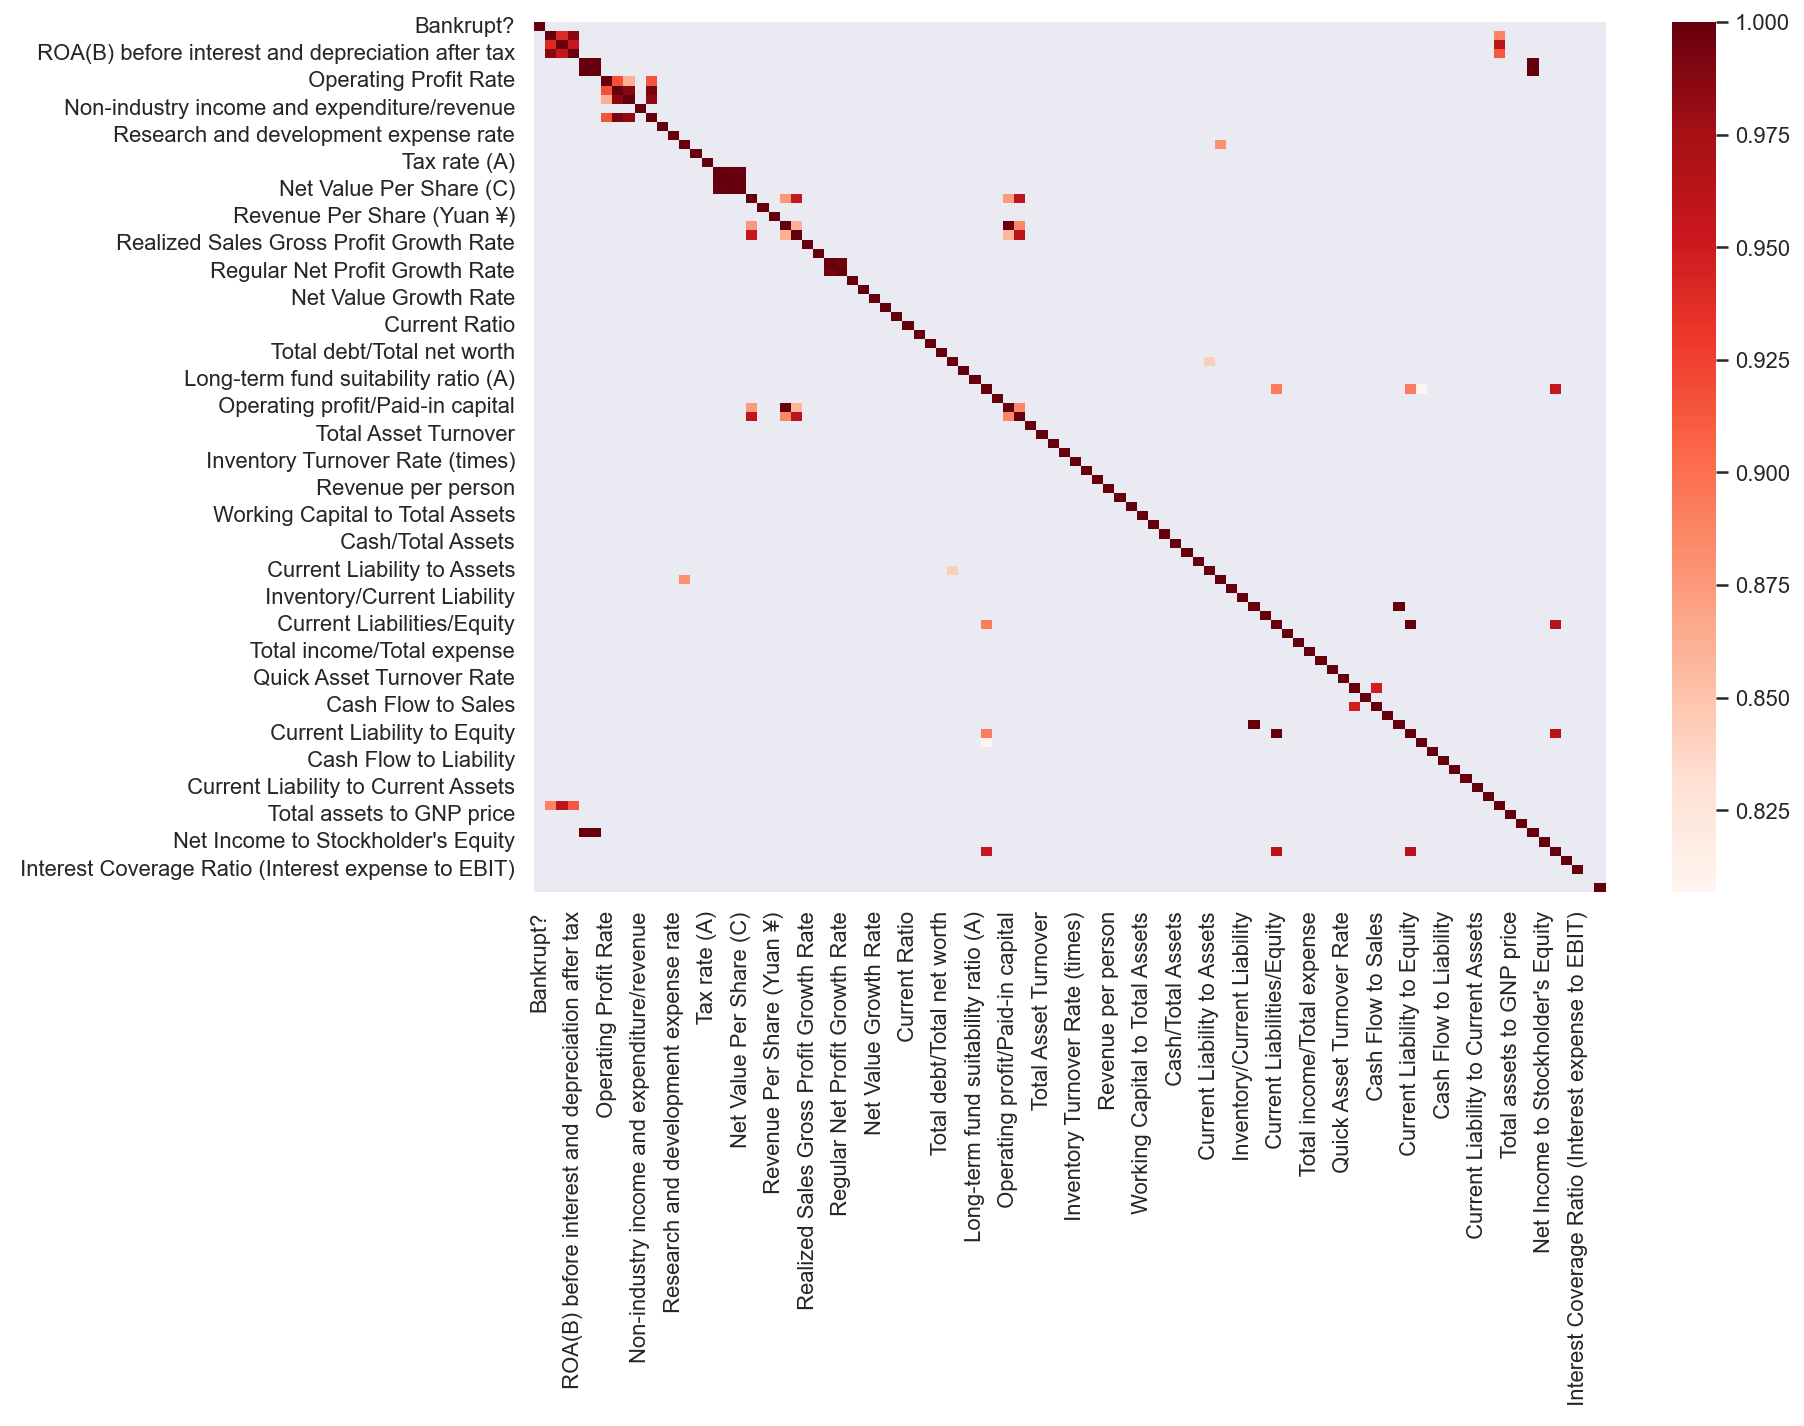

In [76]:
corr = df.corr()
kot = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [86]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

C:\Users\ssai\AppData\Local\Temp\ipykernel_22336\696392375.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


### Columns Hihgly Correlated that can be dropped

In [87]:
to_drop

[' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Realized Sales Gross Margin',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Continuous interest rate (after tax)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Regular Net Profit Growth Rate',
 ' Net worth/Assets',
 ' Operating profit/Paid-in capital',
 ' Net profit before tax/Paid-in capital',
 ' Cash Flow to Sales',
 ' Current Liability to Liability',
 ' Current Liability to Equity',
 ' Net Income to Total Assets',
 ' Gross Profit to Sales',
 ' Liability to Equity']

## Imbalance Of Target Variable

In [90]:
df['Bankrupt?'].value_counts(normalize=True)

0    0.967737
1    0.032263
Name: Bankrupt?, dtype: float64

## TRAIN TEST VALIDATION 

In [235]:
train = pd.read_csv('data/train.csv')
train.drop(columns='Unnamed: 0', inplace=True)
test = pd.read_csv('data/test.csv')
test.drop(columns='Unnamed: 0', inplace=True)
validation = pd.read_csv('data/validation.csv')
validation.drop(columns='Unnamed: 0', inplace=True)

In [98]:
print(train.shape, test.shape, validation.shape)

(3426, 96) (2251, 96) (1142, 96)


In [99]:
test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.514113,0.566779,0.565341,0.613312,0.613312,0.999154,0.797618,0.809497,0.303536,0.781770,...,0.003068,0.624210,0.613313,0.841336,0.277518,0.026847,0.565411,1,0.044359,0
1,0.521718,0.556095,0.573050,0.617997,0.617997,0.999160,0.797619,0.809481,0.303526,0.781745,...,0.000462,0.623265,0.617994,0.840706,0.275538,0.026857,0.565455,1,0.123252,0
2,0.456101,0.498147,0.503560,0.598798,0.598783,0.998930,0.797301,0.809230,0.303452,0.781516,...,0.001663,0.624312,0.598795,0.838877,0.276623,0.026788,0.565142,1,0.060080,0
3,0.503973,0.564544,0.551047,0.608916,0.608866,0.999083,0.797528,0.809416,0.303528,0.781683,...,0.013417,0.623389,0.608916,0.841818,0.281212,0.026807,0.565231,1,0.025054,0
4,0.516502,0.562909,0.568821,0.596030,0.596030,0.998864,0.797700,0.809592,0.304287,0.782017,...,0.009280,0.623988,0.596030,0.840999,0.275701,0.026833,0.565352,1,0.105188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,0.506459,0.561491,0.552974,0.613795,0.613795,0.999129,0.797560,0.809432,0.303489,0.781700,...,0.000668,0.623771,0.613795,0.841224,0.278018,0.026854,0.565440,1,0.039239,0
3422,0.490128,0.558820,0.540928,0.617355,0.617355,0.999098,0.797558,0.809452,0.303549,0.781704,...,0.000451,0.624576,0.617351,0.840952,0.275769,0.026793,0.565166,1,0.099263,0
3423,0.543801,0.599433,0.585256,0.604556,0.604556,0.999089,0.797533,0.809419,0.303523,0.781687,...,0.002748,0.624413,0.604555,0.842790,0.278483,0.026791,0.565158,1,0.035697,0
3424,0.510554,0.567597,0.553616,0.605839,0.605839,0.999039,0.797517,0.809402,0.303601,0.781668,...,0.001185,0.623980,0.605837,0.841886,0.282363,0.026904,0.565645,1,0.022834,0


In [360]:
X = train.drop(columns='Bankrupt?')
y = train['Bankrupt?']

## RFE Decision Tree

In [361]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier


In [362]:
# Running RFE with the output number of the variable equal to 15
dt = DecisionTreeClassifier()
dt.fit(X, y)

rfe = RFE(dt)             # running RFE
rfe = rfe.fit(X, y)

In [363]:
print("Num Features:",  (rfe.n_features_))

Num Features: 47


In [364]:

print("Selected Features:",  (rfe.support_))


Selected Features: [False False  True False  True  True  True  True  True  True  True  True
 False  True False False  True False False  True False  True False  True
 False False False  True  True  True  True False False False  True False
  True False False  True False False False  True  True  True False False
  True False  True False  True False  True  True  True False  True False
  True False  True False  True False  True False  True  True  True False
  True  True False False  True False False False False False False False
 False False  True  True False  True  True  True  True False False]


In [365]:
print("Feature Ranking:",  (rfe.ranking_))

Feature Ranking: [48 46  1  2  1  1  1  1  1  1  1  1  6  1 10  5  1 17 13  1 15  1 11  1
 30  3  7  1  1  1  1 19 40 18  1 23  1 20 44  1 38 41 26  1  1  1 42 47
  1 39  1 14  1 28  1  1  1  4  1 35  1 25  1 27  1 16  1 43  1  1  1  8
  1  1 12 36  1 37 21  9 34 24 31 22 32 33  1  1 29  1  1  1  1 45 49]


In [366]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[(' ROA(C) before interest and depreciation before interest', False, 48),
 (' ROA(A) before interest and % after tax', False, 46),
 (' ROA(B) before interest and depreciation after tax', True, 1),
 (' Operating Gross Margin', False, 2),
 (' Realized Sales Gross Margin', True, 1),
 (' Operating Profit Rate', True, 1),
 (' Pre-tax net Interest Rate', True, 1),
 (' After-tax net Interest Rate', True, 1),
 (' Non-industry income and expenditure/revenue', True, 1),
 (' Continuous interest rate (after tax)', True, 1),
 (' Operating Expense Rate', True, 1),
 (' Research and development expense rate', True, 1),
 (' Cash flow rate', False, 6),
 (' Interest-bearing debt interest rate', True, 1),
 (' Tax rate (A)', False, 10),
 (' Net Value Per Share (B)', False, 5),
 (' Net Value Per Share (A)', True, 1),
 (' Net Value Per Share (C)', False, 17),
 (' Persistent EPS in the Last Four Seasons', False, 13),
 (' Cash Flow Per Share', True, 1),
 (' Revenue Per Share (Yuan ¥)', False, 15),
 (' Operatin

In [368]:
summary = (pd.DataFrame([X.columns, rfe.support_, rfe.ranking_], 
                        index=['Predictor', 'RFE_Select', 'Rank'])
           .T.sort_values(by='Rank'))
summary.loc[summary['RFE_Select']==True]

,Predictor,RFE_Select,Rank
92,Interest Coverage Ratio (Interest expense to ...,True,1
34,Interest Expense Ratio,True,1
36,Debt ratio %,True,1
89,Net Income to Stockholder's Equity,True,1
39,Borrowing dependency,True,1
44,Total Asset Turnover,True,1
45,Accounts Receivable Turnover,True,1
91,Degree of Financial Leverage (DFL),True,1
48,Fixed Assets Turnover Frequency,True,1
50,Revenue per person,True,1


## Feauters Selected RFE Decision Tree

In [184]:
col = summary.loc[summary['RFE_Select']==True]['Predictor'].to_list()

In [198]:
pd.DataFrame(col).to_csv('cols_Decission_tree.csv')

In [ ]:
X = train[col]
y = train['Bankrupt?']

## RFE GardientBoostingClassifier - First Approach

In [371]:
X = train.drop(columns='Bankrupt?')
y = train['Bankrupt?']

In [372]:
# Running RFE with the output number of the variable equal to 15
gbc = GradientBoostingClassifier()

gbc.fit(X, y)

rfe_gbc = RFE(gbc)             # running RFE
rfe_bgc = rfe_gbc.fit(X, y)

In [374]:
summary_gbc = (pd.DataFrame([X.columns, rfe.support_, rfe.ranking_], 
                        index=['Predictor', 'RFE_Select', 'Rank'])
           .T.sort_values(by='Rank'))
summary_gbc.loc[summary['RFE_Select']==True]

,Predictor,RFE_Select,Rank
92,Interest Coverage Ratio (Interest expense to ...,True,1
34,Interest Expense Ratio,True,1
36,Debt ratio %,True,1
89,Net Income to Stockholder's Equity,True,1
39,Borrowing dependency,True,1
44,Total Asset Turnover,True,1
45,Accounts Receivable Turnover,True,1
91,Degree of Financial Leverage (DFL),True,1
48,Fixed Assets Turnover Frequency,True,1
50,Revenue per person,True,1


In [222]:
col = summary_gbc.loc[summary['RFE_Select']==True].values

[' Accounts Receivable Turnover',
 ' Interest Expense Ratio',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Operating profit/Paid-in capital',
 ' Inventory and accounts receivable/Net value',
 ' Total Asset Turnover',
 ' Liability to Equity',
 ' Fixed Assets Turnover Frequency',
 ' Revenue per person',
 ' Allocation rate per person',
 ' Quick Assets/Total Assets',
 ' Current Assets/Total Assets',
 ' Cash/Total Assets',
 ' Cash/Current Liability',
 ' Current Liability to Assets',
 ' Inventory/Current Liability',
 ' Total income/Total expense',
 ' Total expense/Assets',
 ' Current Asset Turnover Rate',
 ' Working capitcal Turnover Rate',
 ' Cash Turnover Rate',
 ' CFO to Assets',
 ' Total assets to GNP price',
 ' No-credit Interval',
 " Net Income to Stockholder's Equity",
 ' Total Asset Return Growth Rate Ratio',
 ' Net Value Growth Rate',
 ' Degree of Financial Leverage (DFL)',
 ' Continuous Net Profit Growth Rate',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pr

In [224]:
X = train[col] 
y = train['Bankrupt?']

## Model Selection

In [228]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
GradientBoostingClassifier()

In [273]:
model1 = LGBMClassifier()
model2 = GradientBoostingClassifier()
model3 = DecisionTreeClassifier()
model4 = AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, fbeta_score

In [243]:
X_train = X.copy()
X_test = test[col]
y_train = y.copy()
y_test = test['Bankrupt?']

In [278]:
def model_inplace(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confuaion_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    preccision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_Score = f1_score(y_test, y_pred) # Score for Postive Values
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    heatmap = sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=2,cmap='Pastel1',fmt='.3g',linecolor='purple',square=True)
    fone_half = fbeta_score(y_test, y_pred, average='macro', beta=0.5) # Average Macro
    fone = fbeta_score(y_test, y_pred, average='macro', beta=1) # Average Macro
    ftwo = fbeta_score(y_test, y_pred, average='macro', beta=2) # Average Macro
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(str(model))
    #plt.savefig(f'viz/confusion_Matrix{str(model)[:40]}.png')
    classification = classification_report(y_test,y_pred)
    return confuaion_matrix, accuracy, preccision, recall, f1_Score, score_train, score_test, fone_half, fone, ftwo, classification, heatmap

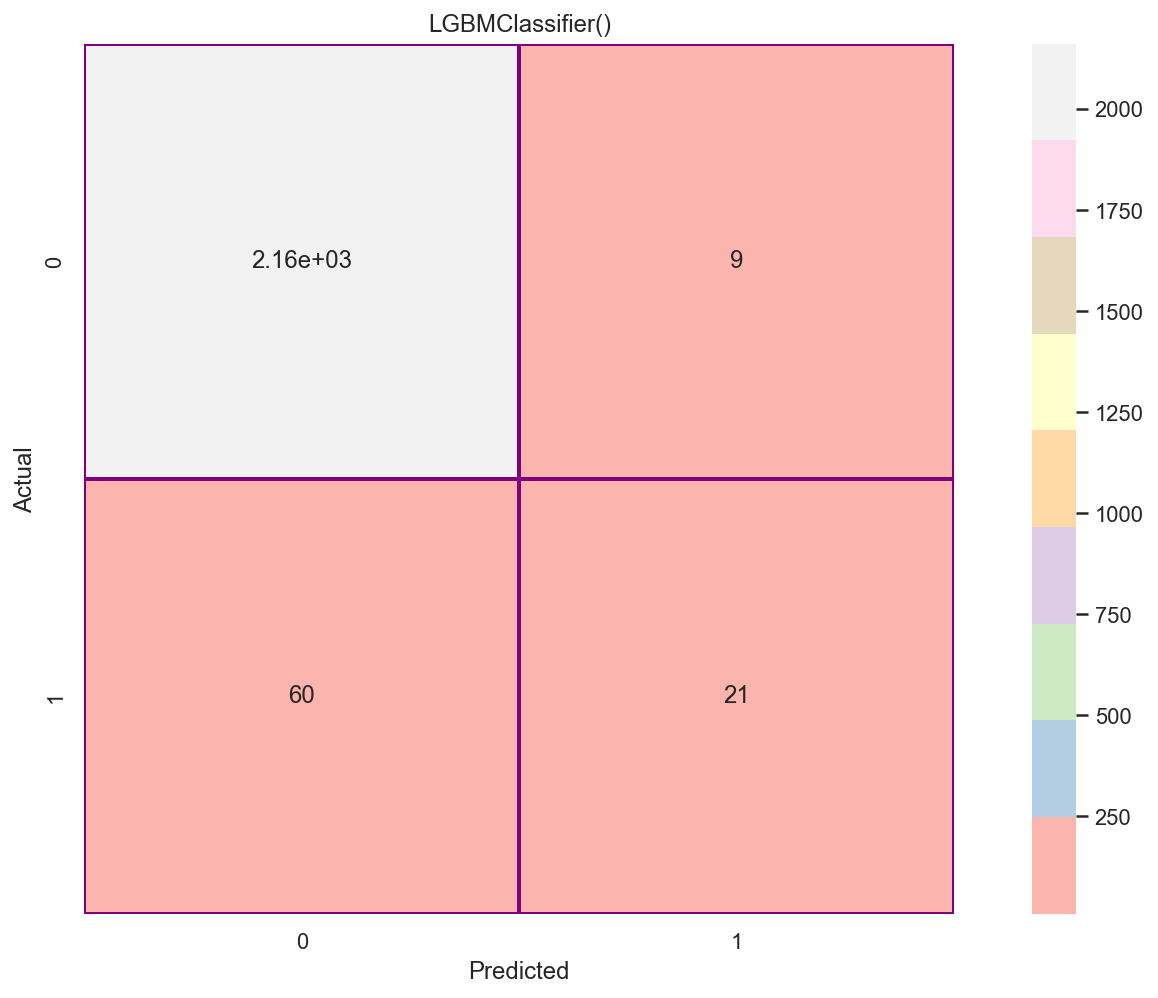

In [279]:
m1confuaion_matrix, m1accuracy, m1preccision, m1recall, m1f1_Score, m1score_train, m1score_test, m1fone_half, m1fone, m1ftwo, m1classification, heatmap  = model_inplace(model1, X_train, X_test, y_train, y_test)


In [284]:
print(f'Confusion Matrix S1M1 \n {m1confuaion_matrix}')
print(f'Accuracy S1M1 {m1accuracy} \n ')
print(f'Precision S1M1 {m1preccision} \n')
print(f'Recall  S1M1 {m1recall} \n')
print(f'F1_Score {m1f1_Score} \n')
print(f'F_One {m1fone} \n')
print(f'F_Half {m1fone_half} \n')
print(f'F_Two {m1ftwo} \n')
print(f'Score_Train {m1score_train} \n')
print(f'Score_test_two {m1score_test} \n')
print(f'{m1classification} \n')




Confusion Matrix S1M1 
 [[2161    9]
 [  60   21]]
Accuracy S1M1 0.9693469569080408 
 
Precision S1M1 0.7 

Recall  S1M1 0.25925925925925924 

F1_Score 0.37837837837837834 

F_One 0.6813322090024436 

F_Half 0.7499311385896643 

F_Two 0.6439018189903274 

Score_Train 1.0 

Score_test_two 0.9693469569080408 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2170
           1       0.70      0.26      0.38        81

    accuracy                           0.97      2251
   macro avg       0.84      0.63      0.68      2251
weighted avg       0.96      0.97      0.96      2251
 



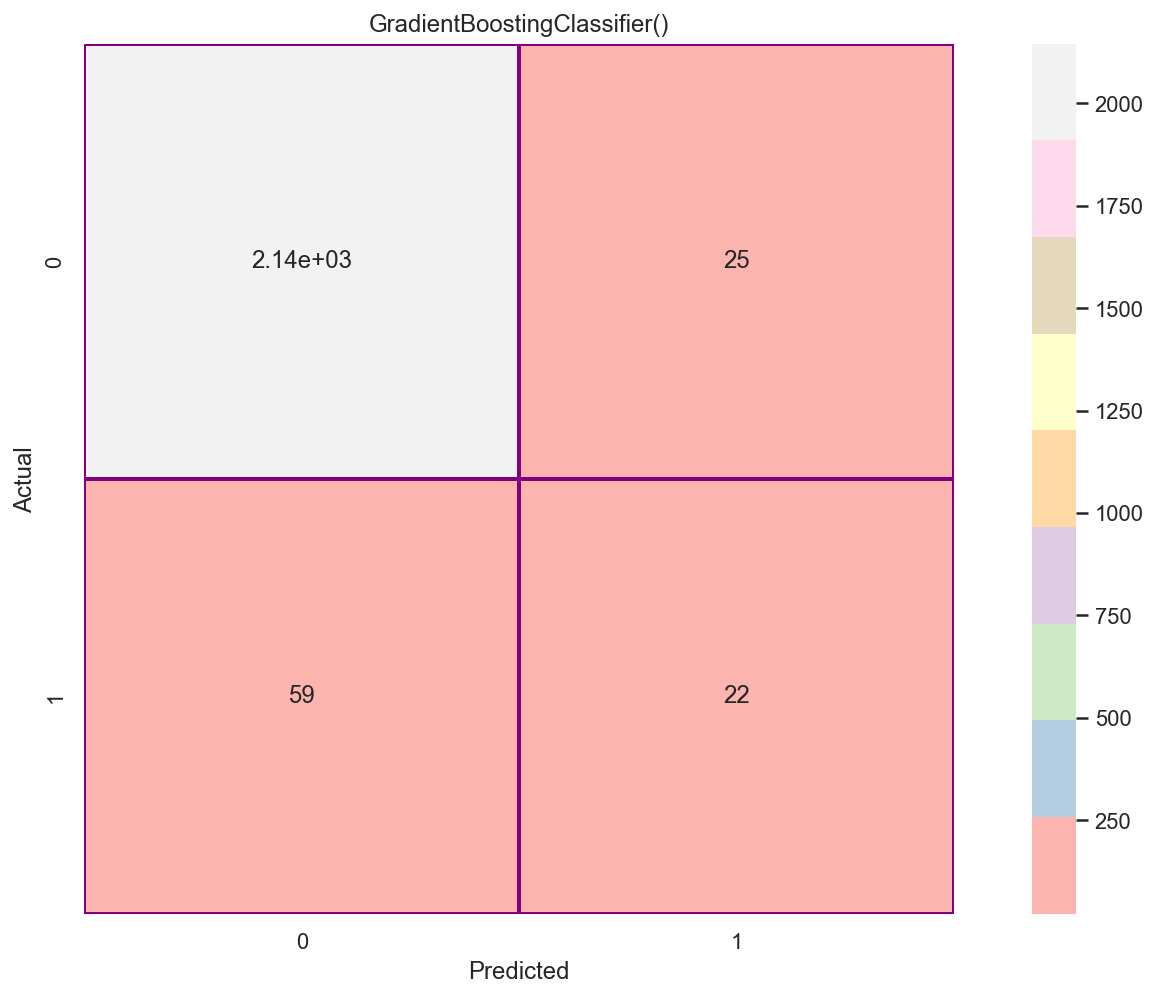

In [285]:
m2confuaion_matrix, m2accuracy, m2preccision, m2recall, m2f1_Score, m2score_train, m2score_test, m2fone_half, m2fone, m2ftwo, m2classification, heatmap  = model_inplace(model2, X_train, X_test, y_train, y_test)


In [286]:
print(f'Confusion Matrix S1M1 \n {m2confuaion_matrix}')
print(f'Accuracy S1M1 {m2accuracy} \n ')
print(f'Precision S1M1 {m2preccision} \n')
print(f'Recall  S1M1 {m2recall} \n')
print(f'F1_Score {m2f1_Score} \n')
print(f'F_One {m2fone} \n')
print(f'F_Half {m2fone_half} \n')
print(f'F_Two {m2ftwo} \n')
print(f'Score_Train {m2score_train} \n')
print(f'Score_test_two {m2score_test} \n')
print(f'{m2classification} \n')


Confusion Matrix S1M1 
 [[2145   25]
 [  59   22]]
Accuracy S1M1 0.9626832518880497 
 
Precision S1M1 0.46808510638297873 

Recall  S1M1 0.2716049382716049 

F1_Score 0.34375 

F_One 0.6622728052126201 

F_Half 0.6925822117639415 

F_Two 0.6409436785469114 

Score_Train 0.997081144191477 

Score_test_two 0.9626832518880497 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2170
           1       0.47      0.27      0.34        81

    accuracy                           0.96      2251
   macro avg       0.72      0.63      0.66      2251
weighted avg       0.96      0.96      0.96      2251
 



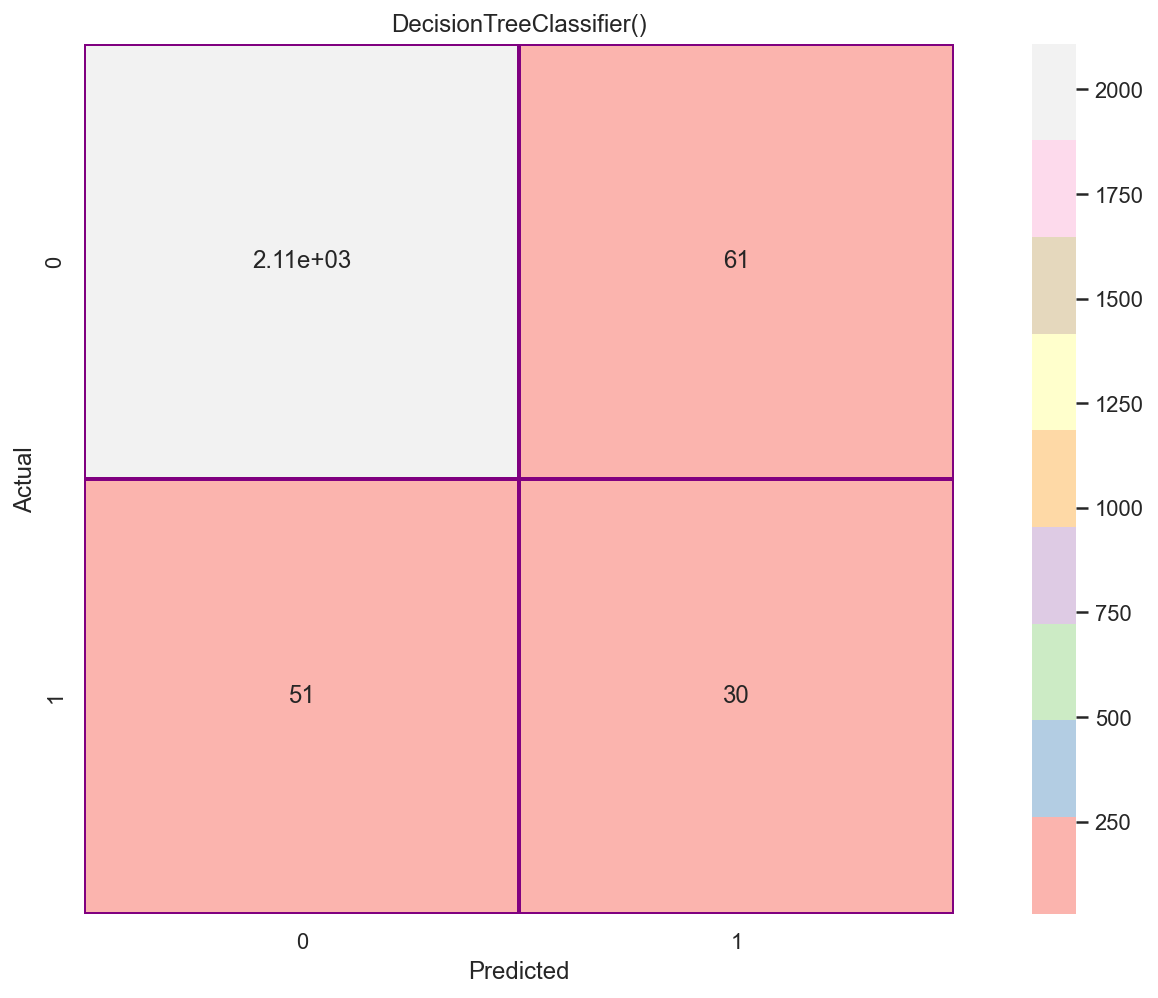

In [287]:
m3confuaion_matrix, m3accuracy, m3preccision, m3recall, m3f1_Score, m3score_train, m3score_test, m3fone_half, m3fone, m3ftwo, m3classification, heatmap  = model_inplace(model3, X_train, X_test, y_train, y_test)


In [288]:
print(f'Confusion Matrix S1M1 \n {m3confuaion_matrix}')
print(f'Accuracy S1M1 {m3accuracy} \n ')
print(f'Precision S1M1 {m3preccision} \n')
print(f'Recall  S1M1 {m3recall} \n')
print(f'F1_Score {m3f1_Score} \n')
print(f'F_One {m3fone} \n')
print(f'F_Half {m3fone_half} \n')
print(f'F_Two {m3ftwo} \n')
print(f'Score_Train {m3score_train} \n')
print(f'Score_test_two {m3score_test} \n')
print(f'{m3classification} \n')

Confusion Matrix S1M1 
 [[2109   61]
 [  51   30]]
Accuracy S1M1 0.950244335850733 
 
Precision S1M1 0.32967032967032966 

Recall  S1M1 0.37037037037037035 

F1_Score 0.34883720930232553 

F_One 0.6614855792470058 

F_Half 0.6562821565550001 

F_Two 0.6671158804961543 

Score_Train 1.0 

Score_test_two 0.950244335850733 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2170
           1       0.33      0.37      0.35        81

    accuracy                           0.95      2251
   macro avg       0.65      0.67      0.66      2251
weighted avg       0.95      0.95      0.95      2251
 



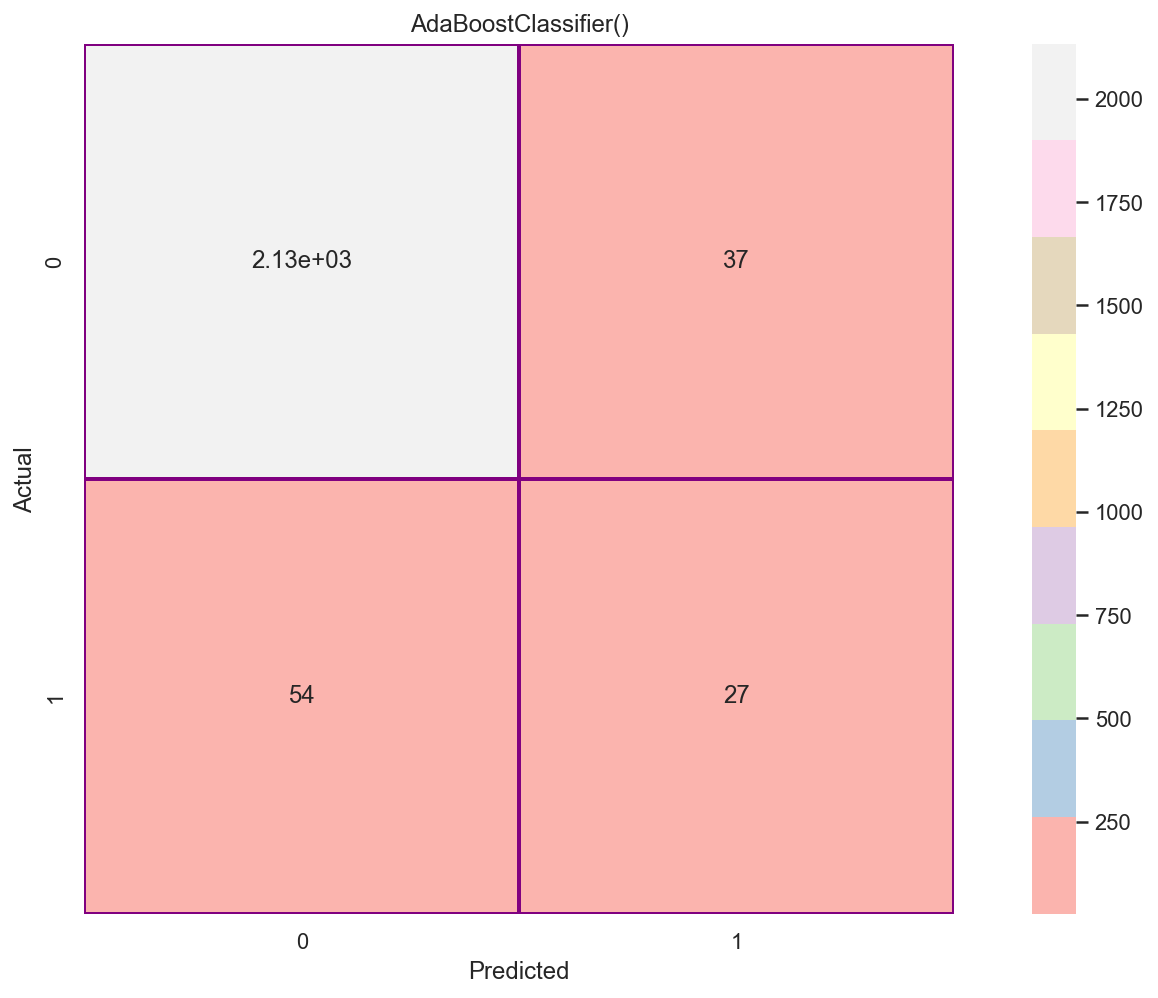

In [289]:
m4confuaion_matrix, m4accuracy, m4preccision, m4recall, m4f1_Score, m4score_train, m4score_test, m4fone_half, m4fone, m4ftwo, m4classification, heatmap  = model_inplace(model4, X_train, X_test, y_train, y_test)


In [290]:
print(f'Confusion Matrix S1M1 \n {m4confuaion_matrix}')
print(f'Accuracy S1M1 {m4accuracy} \n ')
print(f'Precision S1M1 {m4preccision} \n')
print(f'Recall  S1M1 {m4recall} \n')
print(f'F1_Score {m4f1_Score} \n')
print(f'F_One {m4fone} \n')
print(f'F_Half {m4fone_half} \n')
print(f'F_Two {m4ftwo} \n')
print(f'Score_Train {m4score_train} \n')
print(f'Score_test_two {m4score_test} \n')
print(f'{m4classification} \n')

Confusion Matrix S1M1 
 [[2133   37]
 [  54   27]]
Accuracy S1M1 0.9595735228787206 
 
Precision S1M1 0.421875 

Recall  S1M1 0.3333333333333333 

F1_Score 0.3724137931034483 

F_One 0.6757639312085981 

F_Half 0.688710364774801 

F_Two 0.6646748787352991 

Score_Train 0.9816112084063048 

Score_test_two 0.9595735228787206 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2170
           1       0.42      0.33      0.37        81

    accuracy                           0.96      2251
   macro avg       0.70      0.66      0.68      2251
weighted avg       0.96      0.96      0.96      2251
 



### Model Selection SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors = 3, random_state = 42)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
y_train_SMOTE.value_counts(normalize = True)

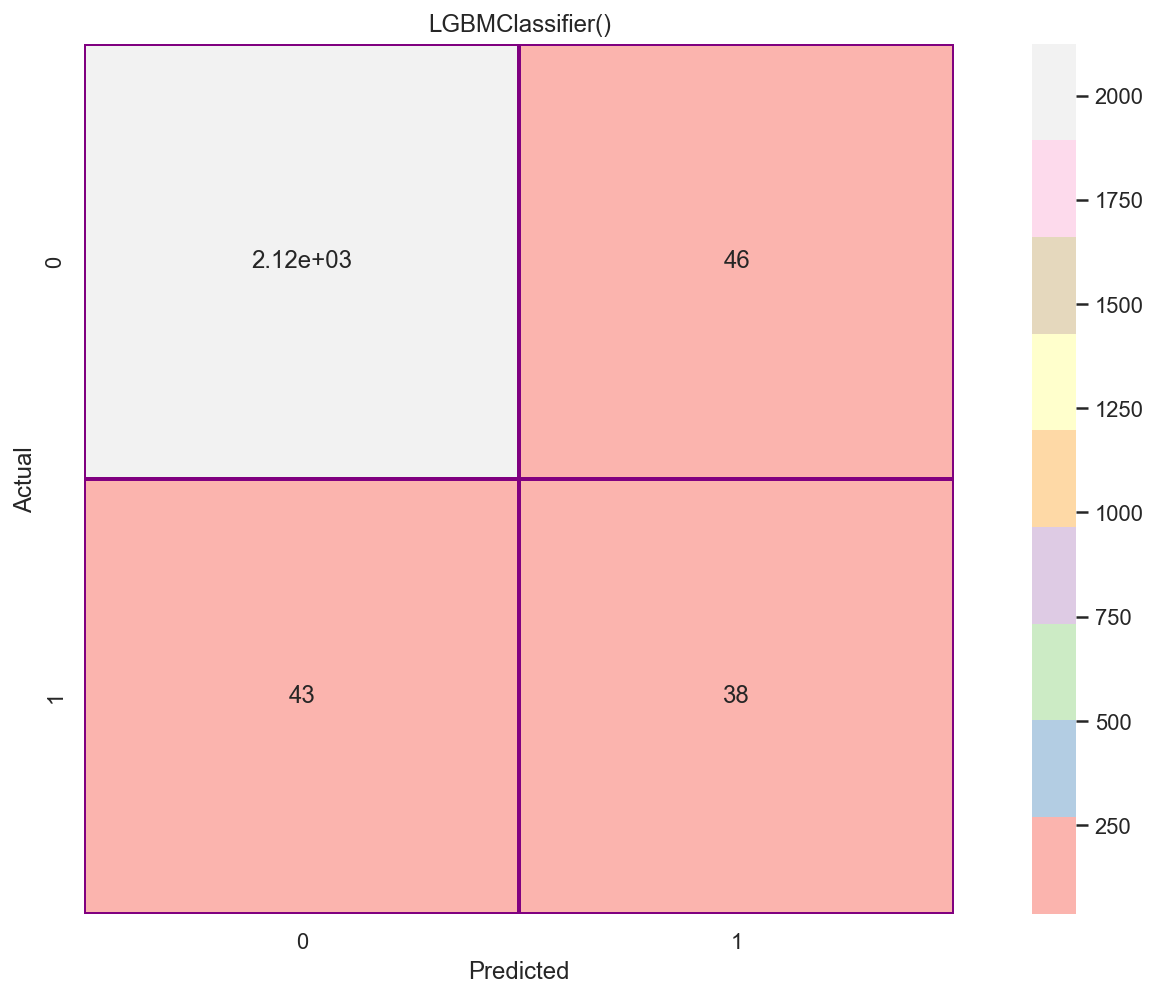

In [299]:
m5confuaion_matrix, m5accuracy, m5preccision, m5recall, m5f1_Score, m5score_train, m5score_test, m5fone_half, m5fone, m5ftwo, m5classification, heatmap  = model_inplace(model1, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

In [300]:
print(f'Confusion Matrix S1M1 \n {m5confuaion_matrix}')
print(f'Accuracy S1M1 {m5accuracy} \n ')
print(f'Precision S1M1 {m5preccision} \n')
print(f'Recall  S1M1 {m5recall} \n')
print(f'F1_Score {m5f1_Score} \n')
print(f'F_One {m5fone} \n')
print(f'F_Half {m5fone_half} \n')
print(f'F_Two {m5ftwo} \n')
print(f'Score_Train {m5score_train} \n')
print(f'Score_test_two {m5score_test} \n')
print(f'{m5classification} \n')

Confusion Matrix S1M1 
 [[2124   46]
 [  43   38]]
Accuracy S1M1 0.9604620168813861 
 
Precision S1M1 0.4523809523809524 

Recall  S1M1 0.4691358024691358 

F1_Score 0.4606060606060606 

F_One 0.7200424815366019 

F_Half 0.7177605396767657 

F_Two 0.7223794145666009 

Score_Train 1.0 

Score_test_two 0.9604620168813861 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2170
           1       0.45      0.47      0.46        81

    accuracy                           0.96      2251
   macro avg       0.72      0.72      0.72      2251
weighted avg       0.96      0.96      0.96      2251
 



In [306]:
lgmc = pd.DataFrame(pd.Series([m1accuracy, m1preccision, m1recall, m1f1_Score, m1fone_half, m1fone, m1ftwo, m1score_train, m1score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two', 'Score_Train', 'Score_Test']), columns=['lgmc'])
gbc = pd.DataFrame(pd.Series([m2accuracy, m2preccision, m2recall, m2f1_Score, m2fone_half, m2fone, m2ftwo, m2score_train, m2score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two', 'Score_Train', 'Score_Test']), columns=['gbc'])
dt = pd.DataFrame(pd.Series([m3accuracy, m3preccision, m3recall, m3f1_Score, m3fone_half, m3fone, m3ftwo, m3score_train, m3score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two', 'Score_Train', 'Score_Test']), columns=['dt'])
AdaB = pd.DataFrame(pd.Series([m4accuracy, m4preccision, m4recall, m4f1_Score, m4fone_half, m4fone, m4ftwo, m4score_train, m4score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two', 'Score_Train', 'Score_Test']), columns=['AdaB'])
lgmc_smot = pd.DataFrame(pd.Series([m5accuracy, m5preccision, m5recall, m5f1_Score, m5fone_half, m5fone, m5ftwo, m5score_train, m5score_test], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two', 'Score_Train', 'Score_Test']), columns=['lgmc_smot'])

models = pd.concat([lgmc, gbc, dt, AdaB, lgmc_smot], axis=1)
models = models.T

# MODEL SELECTION SCORE TABLE 

In [307]:
models

,Accuray,Preccision,Recall,F1_Score,FB_Half,FB_One,FB_Two,Score_Train,Score_Test
lgmc,0.969347,0.700000,0.259259,0.378378,0.749931,0.681332,0.643902,1.000000,0.969347
gbc,0.962683,0.468085,0.271605,0.343750,0.692582,0.662273,0.640944,0.997081,0.962683
dt,0.950244,0.329670,0.370370,0.348837,0.656282,0.661486,0.667116,1.000000,0.950244
AdaB,0.959574,0.421875,0.333333,0.372414,0.688710,0.675764,0.664675,0.981611,0.959574
lgmc_smot,0.960462,0.452381,0.469136,0.460606,0.717761,0.720042,0.722379,1.000000,0.960462


In [308]:
models = models.sort_values(by=['F1_Score', 'FB_Half', 'FB_One', 'FB_Two'], ascending=False).round(2)

In [309]:
models # Best Model is Light Gradien Boosting Machine + SMOT

,Accuray,Preccision,Recall,F1_Score,FB_Half,FB_One,FB_Two,Score_Train,Score_Test
lgmc_smot,0.96,0.45,0.47,0.46,0.72,0.72,0.72,1.00,0.96
lgmc,0.97,0.70,0.26,0.38,0.75,0.68,0.64,1.00,0.97
AdaB,0.96,0.42,0.33,0.37,0.69,0.68,0.66,0.98,0.96
dt,0.95,0.33,0.37,0.35,0.66,0.66,0.67,1.00,0.95
gbc,0.96,0.47,0.27,0.34,0.69,0.66,0.64,1.00,0.96


## Validation

In [317]:
X_val = validation[col]
y_val = validation['Bankrupt?']

In [316]:
validation[col]

,Interest Coverage Ratio (Interest expense to EBIT),Interest Expense Ratio,Debt ratio %,Borrowing dependency,Inventory and accounts receivable/Net value,No-credit Interval,Accounts Receivable Turnover,Degree of Financial Leverage (DFL),Net Income to Stockholder's Equity,Fixed Assets Turnover Frequency,...,Operating Expense Rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (C),Revenue Per Share (Yuan ¥),Research and development expense rate,Regular Net Profit Growth Rate,Operating Profit Per Share (Yuan ¥)
0,0.565158,0.630612,0.104967,0.369637,0.403263,0.623918,0.000763,0.026791,0.842040,0.000526,...,1.333289e-04,0.485698,0.000000,0.194959,0.178079,0.178079,0.031853,4.480000e+09,0.689396,0.114404
1,0.565163,0.630616,0.052453,0.369637,0.399075,0.623865,0.000937,0.026792,0.841287,0.000297,...,1.695231e-04,0.480907,0.000000,0.226440,0.214867,0.214867,0.039173,8.180000e+09,0.689242,0.114567
2,0.565442,0.630741,0.074493,0.371486,0.397606,0.623717,0.001767,0.026854,0.842006,0.000564,...,9.160000e+09,0.476016,0.000305,0.000000,0.224896,0.224896,0.051363,1.650000e+08,0.689342,0.103330
3,0.565308,0.630723,0.075007,0.371665,0.397685,0.623957,0.001185,0.026823,0.842164,0.000222,...,2.263006e-04,0.471587,0.000275,0.079664,0.193291,0.193291,0.030310,7.620000e+09,0.689978,0.112124
4,0.579715,0.680192,0.167004,0.382892,0.398924,0.623848,0.001349,0.025175,0.839748,0.000101,...,4.830000e+09,0.471805,0.000353,0.000000,0.167207,0.167207,0.029342,8.320000e+08,0.689075,0.096165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0.560807,0.633851,0.091816,0.371371,0.401782,0.623833,0.000741,0.026301,0.840053,0.001782,...,3.089807e-04,0.464746,0.000414,0.000000,0.178416,0.178416,0.019269,2.672422e-04,0.689126,0.095432
1138,0.558649,0.625382,0.127732,0.376814,0.397490,0.623987,0.001000,0.026196,0.839699,0.000132,...,2.362454e-04,0.466704,0.000263,0.000000,0.205343,0.205343,0.023383,8.460000e+09,0.689067,0.104063
1139,0.565426,0.630811,0.074614,0.372595,0.395370,0.624212,0.000785,0.026850,0.842333,0.000113,...,4.581518e-04,0.481494,0.000328,0.075716,0.177194,0.177194,0.011313,3.258181e-04,0.689388,0.109844
1140,0.565218,0.630655,0.057956,0.371413,0.395396,0.624216,0.007040,0.026804,0.846377,0.002989,...,8.450000e+09,0.476442,0.000223,0.057597,0.204079,0.204079,0.040307,5.210000e+09,0.689647,0.161225


In [318]:
model1 = LGBMClassifier()

In [319]:
model1.fit(X_train_SMOTE, y_train_SMOTE)

LGBMClassifier()

In [321]:
val_pred = model1.predict(X_val)

In [327]:
confuaion_matrix = confusion_matrix(y_val, val_pred)
accuracy = accuracy_score(y_val, val_pred)
preccision = precision_score(y_val, val_pred)
recall = recall_score(y_val, val_pred)
f1_Score = f1_score(y_val, val_pred)

fone_half = fbeta_score(y_val, val_pred, average='macro', beta=0.5)
fone = fbeta_score(y_val, val_pred, average='macro', beta=1)
ftwo = fbeta_score(y_val, val_pred, average='macro', beta=2)
classification = classification_report(y_val,val_pred)

In [329]:
print(f'Confusion Matrix S1M1 \n {confuaion_matrix}')
print(f'Accuracy S1M1 {accuracy} \n ')
print(f'Precision S1M1 {preccision} \n')
print(f'Recall  S1M1 {recall} \n')
print(f'F1_Score {f1_Score} \n')
print(f'F_One {fone} \n')
print(f'F_Half {fone_half} \n')
print(f'F_Two {ftwo} \n')
print(f'{classification} \n')

Confusion Matrix S1M1 
 [[1080   26]
 [  22   14]]
Accuracy S1M1 0.957968476357268 
 
Precision S1M1 0.35 

Recall  S1M1 0.3888888888888889 

F1_Score 0.36842105263157887 

F_One 0.6733409610983981 

F_Half 0.6682341053940619 

F_Two 0.6788167398385498 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1106
           1       0.35      0.39      0.37        36

    accuracy                           0.96      1142
   macro avg       0.67      0.68      0.67      1142
weighted avg       0.96      0.96      0.96      1142
 



In [340]:
lgmc_smot = pd.DataFrame(pd.Series([m5accuracy, m5preccision, m5recall, m5f1_Score, m5fone_half, m5fone, m5ftwo], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two']), columns=['lgmc_smot'])
validation_lgmc_smot = pd.DataFrame(pd.Series([accuracy, preccision, recall, f1_Score, fone_half, fone, ftwo], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two']), columns=['lgmc_smot_validation'])

In [341]:
model_validation = pd.concat([lgmc_smot, validation_lgmc_smot], axis=1).T

In [342]:
model_validation 

,Accuray,Preccision,Recall,F1_Score,FB_Half,FB_One,FB_Two
lgmc_smot,0.960462,0.452381,0.469136,0.460606,0.717761,0.720042,0.722379
lgmc_smot_validation,0.957968,0.350000,0.388889,0.368421,0.668234,0.673341,0.678817


## Hyper Tunning

In [344]:
model_tuned = LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [345]:
model_tuned.fit(X_train_SMOTE, y_train_SMOTE)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, feature_fraction=0.9,
               learning_rate=0.05, min_child_samples=96, min_split_gain=0.7,
               n_estimators=180, num_leaves=10, random_state=123,
               reg_alpha=0.0001, reg_lambda=0.1)

In [346]:
tconfuaion_matrix = confusion_matrix(y_val, val_pred)
taccuracy = accuracy_score(y_val, val_pred)
tpreccision = precision_score(y_val, val_pred)
trecall = recall_score(y_val, val_pred)
tf1_Score = f1_score(y_val, val_pred)

tfone_half = fbeta_score(y_val, val_pred, average='macro', beta=0.5)
tfone = fbeta_score(y_val, val_pred, average='macro', beta=1)
tftwo = fbeta_score(y_val, val_pred, average='macro', beta=2)
tclassification = classification_report(y_val,val_pred)

In [347]:
print(f'Confusion Matrix S1M1 \n {tconfuaion_matrix}')
print(f'Accuracy S1M1 {taccuracy} \n ')
print(f'Precision S1M1 {tpreccision} \n')
print(f'Recall  S1M1 {trecall} \n')
print(f'F1_Score {tf1_Score} \n')
print(f'F_One {tfone} \n')
print(f'F_Half {tfone_half} \n')
print(f'F_Two {tftwo} \n')
print(f'{tclassification} \n')

Confusion Matrix S1M1 
 [[1080   26]
 [  22   14]]
Accuracy S1M1 0.957968476357268 
 
Precision S1M1 0.35 

Recall  S1M1 0.3888888888888889 

F1_Score 0.36842105263157887 

F_One 0.6733409610983981 

F_Half 0.6682341053940619 

F_Two 0.6788167398385498 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1106
           1       0.35      0.39      0.37        36

    accuracy                           0.96      1142
   macro avg       0.67      0.68      0.67      1142
weighted avg       0.96      0.96      0.96      1142
 



In [353]:
lgmc_smot = pd.DataFrame(pd.Series([m5accuracy, m5preccision, m5recall, m5f1_Score, m5fone_half, m5fone, m5ftwo], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two']), columns=['lgmc_smot_Train_Test'])
validation_lgmc_smot = pd.DataFrame(pd.Series([accuracy, preccision, recall, f1_Score, fone_half, fone, ftwo], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two']), columns=['lgmc_smot_validation'])
validation_lgmc_smot_tuned = pd.DataFrame(pd.Series([taccuracy, tpreccision, trecall, tf1_Score, tfone_half, tfone, tftwo], index=['Accuray', 'Preccision', 'Recall', 'F1_Score', 'FB_Half', 'FB_One', 'FB_Two']), columns=['lgmc_smot_Validaton_Tuned'])

In [354]:
model_validation = pd.concat([lgmc_smot, validation_lgmc_smot, validation_lgmc_smot_tuned], axis=1).T

# FINAL RESULTS

In [355]:
model_validation.sort_values(by=['F1_Score', 'FB_Half', 'FB_One', 'FB_Two'], ascending=False).round(2)

,Accuray,Preccision,Recall,F1_Score,FB_Half,FB_One,FB_Two
lgmc_smot_Train_Test,0.96,0.45,0.47,0.46,0.72,0.72,0.72
lgmc_smot_validation,0.96,0.35,0.39,0.37,0.67,0.67,0.68
lgmc_smot_Validaton_Tuned,0.96,0.35,0.39,0.37,0.67,0.67,0.68
